In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, firwin, iirfilter, lfilter
signal = np.fromfile("C:\\Users\\ASUS\\Downloads\\emg_myopathy.dat", dtype=np.float32)
signal = np.nan_to_num(signal, nan=0.0, posinf=0.0, neginf=0.0)
signal = np.clip(signal, -1e3, 1e3)
fs = 1000
t = np.linspace(0, len(signal)/fs, len(signal), endpoint=False)
def butter_filter(data, cutoff, fs, btype='low', order=4):
    nyq = 0.5 * fs
    b, a = butter(order, cutoff/nyq, btype=btype)
    return lfilter(b, a, data)
def fir_filter(data, cutoff, fs, btype='low', numtaps=101):
    nyq = 0.5 * fs
    coeffs = firwin(numtaps, cutoff/nyq, pass_zero=(btype=='low'))
    return lfilter(coeffs, 1.0, data)
def iir_custom_filter(data, cutoff, fs, btype='low', order=4):
    nyq = 0.5 * fs
    b, a = iirfilter(N=order, Wn=cutoff/nyq, btype=btype, ftype='cheby1', rp=0.5)
    return lfilter(b, a, data)
def calculate_snr(original, filtered):
    noise = original - filtered
    return 10 * np.log10(np.mean(filtered**2) / np.mean(noise**2))
cutoff_low = 50
cutoff_high = 100
butter_low = butter_filter(signal, cutoff_low, fs, 'low')
butter_high = butter_filter(signal, cutoff_high, fs, 'high')
fir_low = fir_filter(signal, cutoff_low, fs, 'low')
fir_high = fir_filter(signal, cutoff_high, fs, 'high')
iir_low = iir_custom_filter(signal, cutoff_low, fs, 'low')
iir_high = iir_custom_filter(signal, cutoff_high, fs, 'high')
snr_results = {
    "Butterworth Low-Pass": calculate_snr(signal, butter_low),
    "Butterworth High-Pass": calculate_snr(signal, butter_high),
    "FIR Low-Pass": calculate_snr(signal, fir_low),
    "FIR High-Pass": calculate_snr(signal, fir_high),
}
for filter_type, snr in snr_results.items():
    print(f"{filter_type}: {snr:.2f} dB")



Butterworth Low-Pass: 0.08 dB
Butterworth High-Pass: -6.28 dB
FIR Low-Pass: -1.31 dB
FIR High-Pass: -6.88 dB


Text(0, 0.5, 'Amplitude')

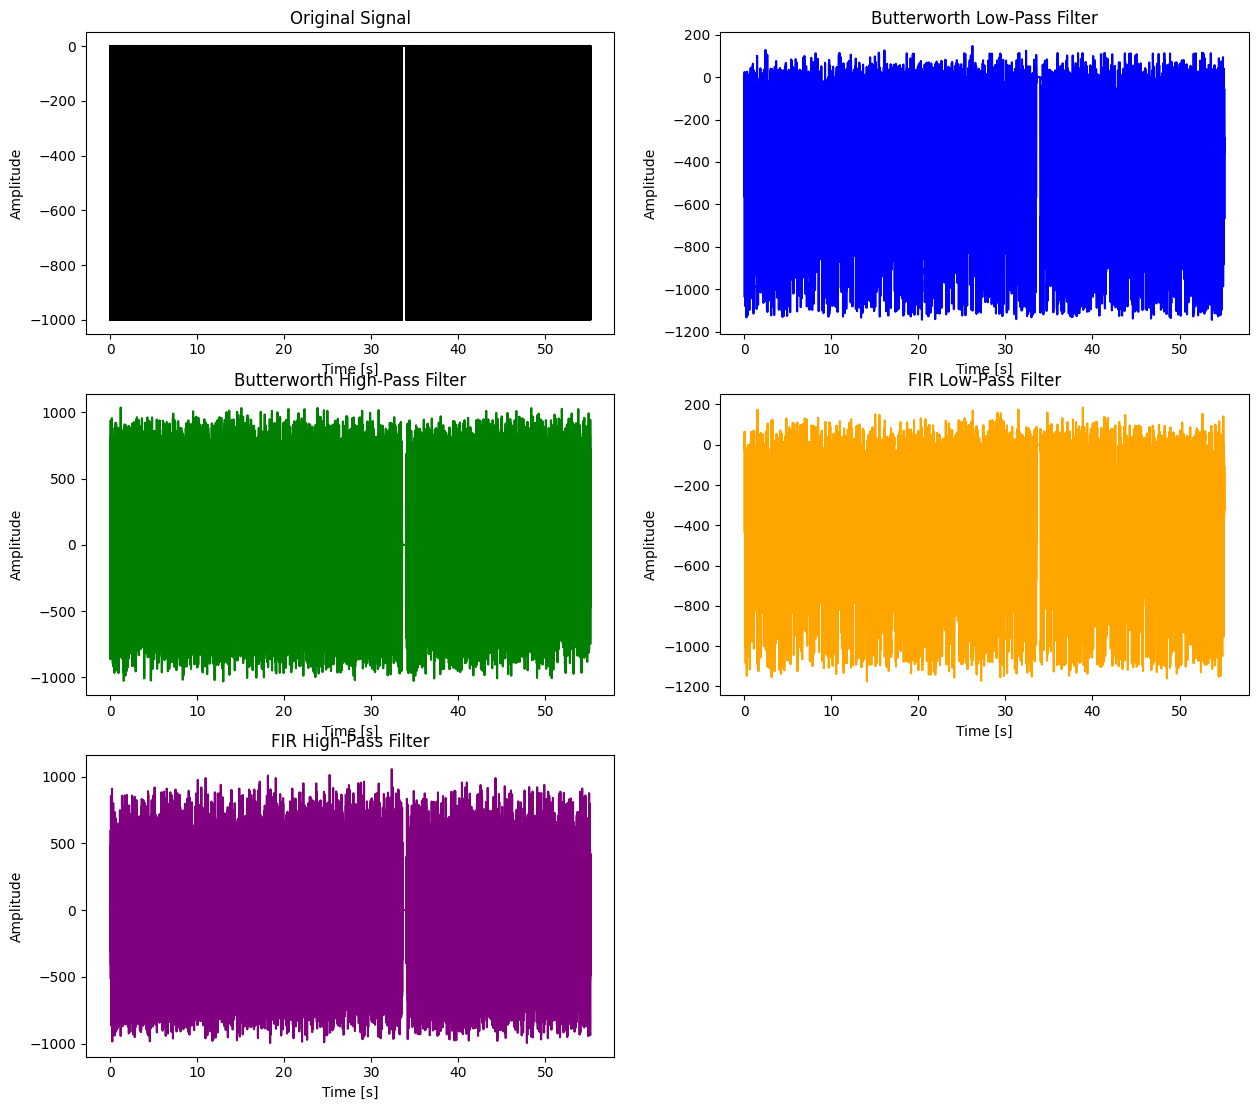

In [ ]:
plt.figure(figsize=(15, 18))

plt.subplot(4, 2, 1)
plt.plot(t, signal, color='black')
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 2)
plt.plot(t, butter_low, color='blue')
plt.title(f"Butterworth Low-Pass Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 3)
plt.plot(t, butter_high, color='green')
plt.title(f"Butterworth High-Pass Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 4)
plt.plot(t, fir_low, color='orange')
plt.title(f"FIR Low-Pass Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 5)
plt.plot(t, fir_high, color='purple')
plt.title(f"FIR High-Pass Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")